## Assessment of network inversion - temporal coherence
+ Figure 10 - Temporal Coherence Improvement after proper configuration of network inversion.

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mintpy.defaults.plot import *
from mintpy.objects import sensor
from mintpy.utils import ptime, readfile, plot as pp, network as pnet
from mintpy import plot_network


work_dir = os.path.expanduser('~/insarlab/Galapagos/SierraNegraAlosAT133/mintpy')
os.chdir(work_dir)
print('Go to diretory: '+work_dir)

proj_name = sensor.project_name2sensor_name(work_dir)[1]

Go to diretory: /Users/yunjunz/insarlab/Galapagos/SierraNegraAlosAT133/mintpy


read temporal/spatial baseline info from file: ./inputs/ifgramStack.h5
['ifgramStack_coherence_spatialAvg.txt'] exists and is newer than ['./inputs/ifgramStack.h5', 'waterMask.h5'] --> skip.
ifgramStack_coherence_spatialAvg.txt already exists, read it directly
number of acquisitions: 22
number of interferograms: 228
--------------------------------------------------
number of interferograms marked as drop: 90
number of interferograms marked as keep: 138
number of acquisitions marked as drop: 0
max coherence of excluded interferograms: 0.6892
read temporal/spatial baseline info from file: ./inputs/ifgramStack.h5
['ifgramStack_coherence_spatialAvg.txt'] exists and is newer than ['./inputs/ifgramStack.h5', 'waterMask.h5'] --> skip.
ifgramStack_coherence_spatialAvg.txt already exists, read it directly
number of acquisitions: 22
number of interferograms: 228
--------------------------------------------------
number of interferograms marked as drop: 90
number of interferograms marked as keep

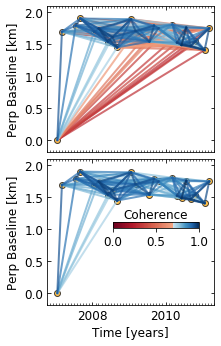

In [2]:
## Fig. 10a - network modification

# plot setting using plot_network.py parsing function
scp_args = './inputs/ifgramStack.h5 --cmap-vlist 0.0 0.7 1.0 --notitle '.split()
inps = plot_network.cmd_line_parse(scp_args)
inps.maskFile = 'waterMask.h5'
inps.cbar_label = 'Coherence'
inps.disp_cbar = False
inps.disp_min = 0
inps.markersize = 6
inps.legend_loc = (0.15, 0.1)
inps.disp_legend = False
inps.disp_drop = False
inps.every_year = 2
inps = plot_network.read_network_info(inps)
inps.pbaseList = [i/1000. for i in inps.pbaseList]
inps.ylabel = 'Perp Baseline [km]'

# list of date12 to date
m_dates = [date12.split('_')[0] for date12 in inps.date12List]
s_dates = [date12.split('_')[1] for date12 in inps.date12List]
date_list = sorted(ptime.yyyymmdd(list(set(m_dates + s_dates))))
num_date = len(date_list)

cmap = pp.ColormapExt('RdBu_truncate', vlist=[0.0, 0.7, 1.0]).colormap
print_msg = False

# plot figure
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[3, 5.5])
pp.plot_network(ax[0], inps.date12List, inps.dateList, inps.pbaseList, dict(vars(inps)), print_msg=print_msg)
pp.plot_network(ax[1], inps.date12List, inps.dateList, inps.pbaseList, dict(vars(inps)), inps.date12List_drop, print_msg=print_msg)
# axis format
ax[0].set_xticklabels([])
ax[0].set_xlabel('')
plt.subplots_adjust(hspace=0.05)
# colorbar
cax = fig.add_axes([0.43, 0.32, 0.4, 0.015])
cbar = mpl.colorbar.ColorbarBase(ax=cax, cmap=cmap, ticks=[0., 0.5, 1.], orientation='horizontal')
cbar.ax.tick_params(which='both', direction='out', labelsize=font_size)
cbar.set_label('Coherence', fontsize=font_size)
cax.xaxis.set_label_position("top")

#fig.savefig('{}_net_coh.png'.format(proj_name), bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()

In [3]:
## Fig. 10b - prepare data
# setup
geom_file = os.path.join(work_dir, 'inputs/geometryRadar.h5')
tcoh_files = [os.path.join(work_dir, 'NET_INV', i) for i in ['temporalCoherence_allNet_noWeight.h5',
                                                             'temporalCoherence_cohNet_varWeight.h5']]
min_coherence = 0.7

# read info
atr = readfile.read_attribute(tcoh_files[0])
ref_y, ref_x = int(atr['REF_Y']), int(atr['REF_X'])
dem = readfile.read(geom_file, datasetName='height')[0]
tcohs = [readfile.read(i)[0] for i in tcoh_files]
tmasks = [tcoh >= min_coherence for tcoh in tcohs]
print('Done.')

Done.


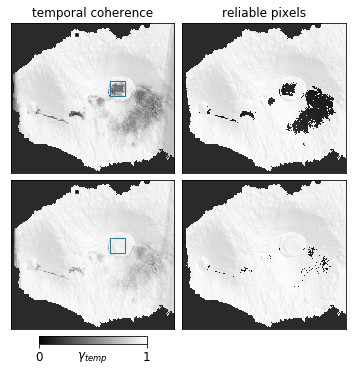

In [4]:
## Fig. 10b - plot figure

inps = pp.cmd_line_parse()
inps.disp_dem_contour = False

# plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=[6, 7])
for i in range(len(tcohs)):
    pp.plot_dem_background(ax=axs[i, 0], geo_box=None, dem=dem, inps=inps, print_msg=False)
    pp.plot_dem_background(ax=axs[i, 1], geo_box=None, dem=dem, inps=inps, print_msg=False)
    im = axs[i, 0].imshow(tcohs[i],   vmin=0., vmax=1., cmap='gray', alpha=0.8)
    axs[i, 0].plot(ref_x, ref_y, 'ks', ms=3, mew=0.5)
    axs[i, 1].imshow(tmasks[i], vmin=0., vmax=1., cmap='gray', alpha=0.8)
# AOI
x0, y0, x1, y1 = (582, 449, 674, 538)
pts_x = [x0, x1, x1, x0, x0]
pts_y = [y0, y0, y1, y1, y0]
axs[0, 0].plot(pts_x, pts_y, '-', lw=1)
axs[1, 0].plot(pts_x, pts_y, '-', lw=1)

# axis format
for ax in axs.flatten().tolist():
    pp.auto_flip_direction(atr, ax=ax, print_msg=False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
axs[0, 0].set_title('temporal coherence', fontsize=font_size)
axs[0, 1].set_title('reliable pixels', fontsize=font_size)
fig.subplots_adjust(wspace=0.05, hspace=-0.3)
# colorbar
cax = fig.add_axes([0.19, 0.17, 0.25, 0.015])
cbar = plt.colorbar(im, cax=cax, ticks=[0, 1], orientation='horizontal')
cbar.ax.tick_params(which='both', direction='out', labelsize=font_size)
cbar.set_label(r'$\gamma_{temp}$', fontsize=font_size, labelpad=-14)

#plt.savefig('{}_tempCoh_compare.png'.format(proj_name), bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()